# –í—Å—Ç—É–ø–ª–µ–Ω–∏–µ

___

–î–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –¥–ª—è –Ω–∞—á–∞–ª–∞ –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç—å –¥–∞–Ω–Ω—ã–µ. –î–ª—è —Ä–∞–±–æ—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏ —Ö–æ—Ä–æ—à–æ –ø–æ–¥—Ö–æ–¥—è—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫–∏: numpy, pandas –∏ matplotlib.

–î–ª—è –Ω–∞—á–∞–ª–∞ –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º —ç—Ç–∏ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏.

–í –¥–∞–ª—å–Ω–µ–π—à–µ–º –≤ —ç—Ç–æ—Ç –±–ª–æ–∫ –∫–æ–¥–∞ –±—É–¥–µ–º –¥–æ–±–∞–≤–ª—è—Ç—å –∏ –¥—Ä—É–≥–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –ø–æ –º–µ—Ä–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ü–æ—Å–∫–æ–ª—å–∫—É –¥–∞–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ —Ç–∞–±–ª–∏—á–Ω–æ–º —Ñ–æ—Ä–º–∞—Ç–µ —É–¥–æ–±–Ω–µ–µ –≤—Å–µ–≥–æ —Å –Ω–∏–º–∏ —Ä–∞–±–æ—Ç–∞—Ç—å –≤ –≤–∏–¥–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ pandas. –§–∞–π–ª —Å –¥–∞–Ω–Ω—ã–º–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–π, –ø–æ—ç—Ç–æ–º—É –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–µ –µ–≥–æ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –∑–∞–≥—Ä—É–∑–∏—Ç—å –Ω–∞ –≥—É–≥–ª –¥–∏—Å–∫. Google Colab —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –≥—É–≥–ª –¥–∏—Å–∫–æ–º, –ø–æ—ç—Ç–æ–º—É —Å–º–æ–Ω—Ç–∏—Ä—É–µ–º –µ–≥–æ –≤ –Ω–æ—É—Ç–±—É–∫

In [3]:
drive.mount('/content/drive')
path_to_dir = '/content/drive/MyDrive/Colab Notebooks/spam_filter_vk'
name_dataset_train = 'train_spam.csv'
name_dataset_test = 'test_spam.csv'
df_train = pd.read_csv('/'.join([path_to_dir, name_dataset_train]))
df_test = pd.read_csv('/'.join([path_to_dir, name_dataset_test]))

Mounted at /content/drive


–ò–∑—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
–î–∞–ª—å—à–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ–Ω—è—Ç—å —á—Ç–æ –∏–∑ —Å–µ–±—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –¥–∞–Ω–Ω—ã–µ
–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ train

In [4]:
print(df_train.head(10))
print(df_train.shape)
print(df_train.dtypes.value_counts())

  text_type                                               text
0       ham  make sure alex knows his birthday is over in f...
1       ham  a resume for john lavorato thanks vince i will...
2      spam  plzz visit my website moviesgodml to get all m...
3      spam  urgent your mobile number has been awarded wit...
4       ham  overview of hr associates analyst project per ...
5      spam  i am so greatful to mrs valerie dodson for hel...
6       ham  url url date not supplied government employees...
7      spam  welcome to jefferson pilot s gateway to wealth...
8       ham  looks like your ham corpus by and large has to...
9       ham  how are you with moneyas in to youmoney aint a...
(16278, 2)
object    2
Name: count, dtype: int64


–í —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ 16278 –∑–∞–ø–∏—Å–µ–π. –ö–∞–∂–¥–∞—è –∑–∞–ø–∏—Å—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –∏–∑ —Å–µ–±—è —Ç–µ–∫—Å—Ç —Å–æ–æ–±—â–µ–Ω–∏—è –∏ –º–µ—Ç–∫—É spam (—Å–ø–∞–º) –∏–ª–∏ ham (–Ω–µ —Å–ø–∞–º)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ test

In [5]:
print(df_test.head(10))
print(df_test.shape)
print(df_test.dtypes.value_counts())

                                                text
0  j jim whitehead ejw cse ucsc edu writes j you ...
1  original message from bitbitch magnesium net p...
2  java for managers vince durasoft who just taug...
3               there is a youtuber name saiman says
4  underpriced issue with high return on equity t...
5                          aight lemme know whats up
6  hey girl how r u hope u r well me an del r bak...
7  carnegie mellon recruiting good afternoon i ha...
8  cv of rodney greene re quantitative positions ...
9  i cant able to cos of me he drunk today im rea...
(4070, 1)
object    1
Name: count, dtype: int64


–í —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ 4070 —Å–æ–æ–±—â–µ–Ω–∏–π, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏—Ö –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞—Ç—å –Ω–∞ —Å–ø–∞–º –∏ –Ω–µ —Å–ø–∞–º

–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –∫–ª–∞—Å—Å—ã —Å–ø–∞–º –∏ –Ω–µ —Å–ø–∞–º –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ

In [6]:
print(df_train['text_type'].value_counts())

text_type
ham     11469
spam     4809
Name: count, dtype: int64


–°–æ–æ–±—â–µ–Ω–∏–π —Å –ø–æ–º–µ—Ç–∫–æ–π —Å–ø–∞–º –ø—Ä–∏–º–µ—Ä–Ω–æ –≤ 2 —Ä–∞–∑–∞ –º–µ–Ω—å—à–µ, —á–µ–º –ø–æ–ª–µ–∑–Ω—ã—Ö

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω —Å–æ–æ–±—â–µ–Ω–∏–π –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Å–∏–º–≤–æ–ª–æ–≤


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏

–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 1
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 800
–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 310.3835237744195
–ú–µ–¥–∏–∞–Ω–∞ –¥–ª–∏–Ω —Å–æ–æ–±—â–µ–Ω–∏–π 157.0


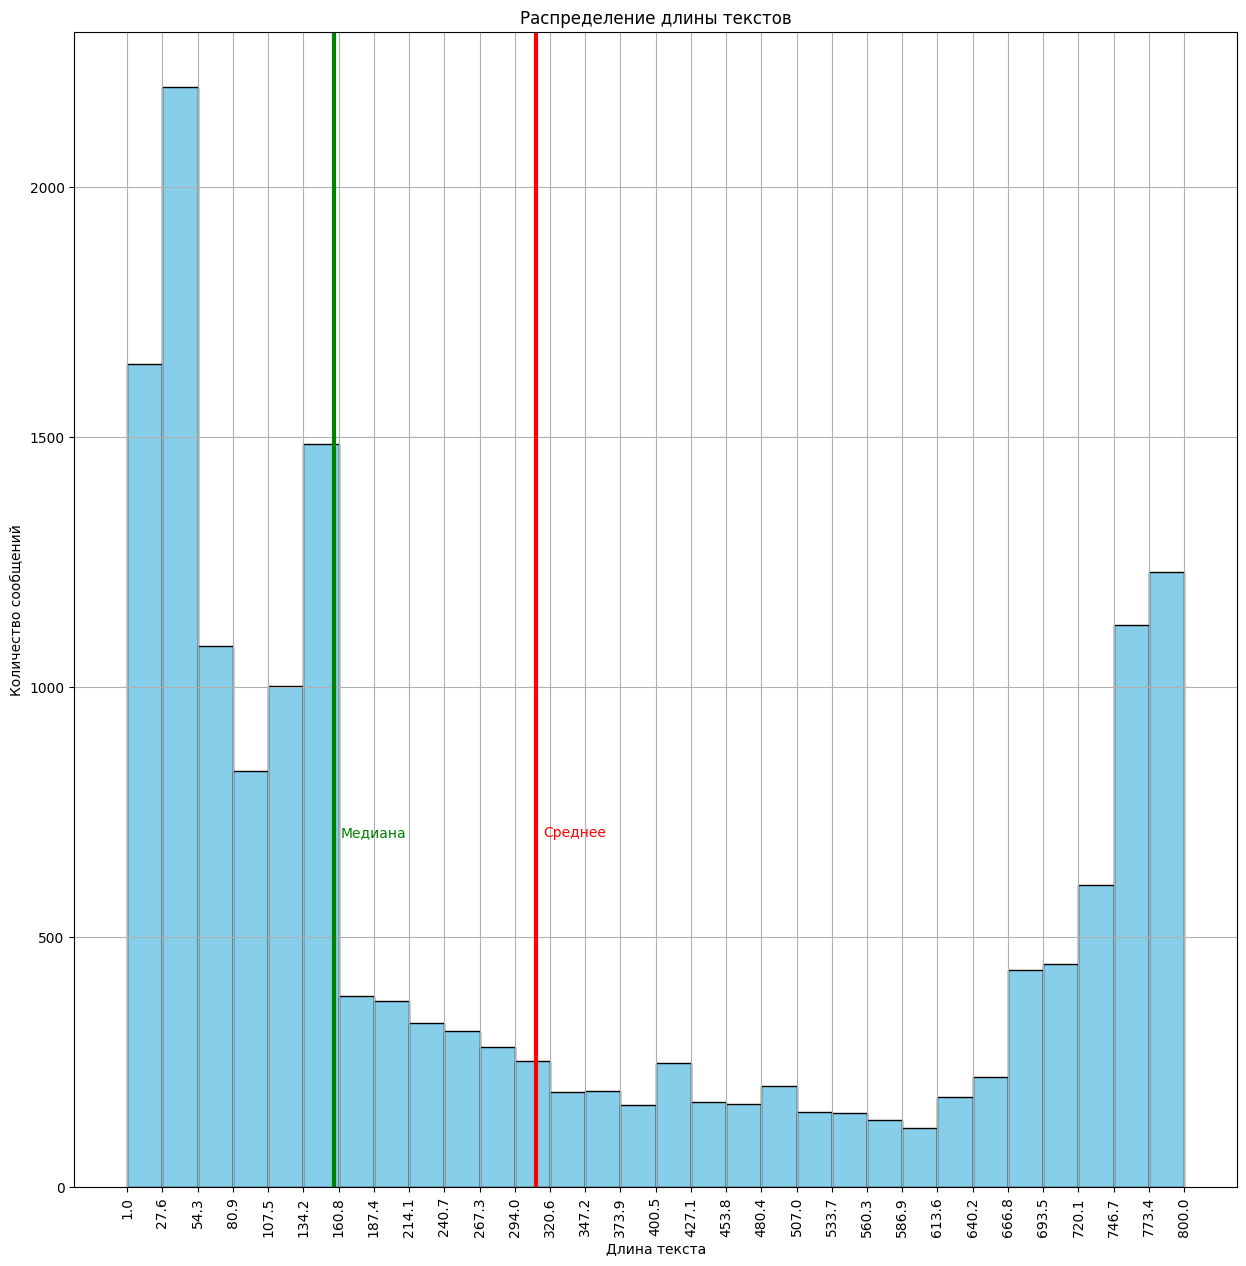


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏

–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 2
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 800
–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 313.03562653562653
–ú–µ–¥–∏–∞–Ω–∞ –¥–ª–∏–Ω —Å–æ–æ–±—â–µ–Ω–∏–π 158.0


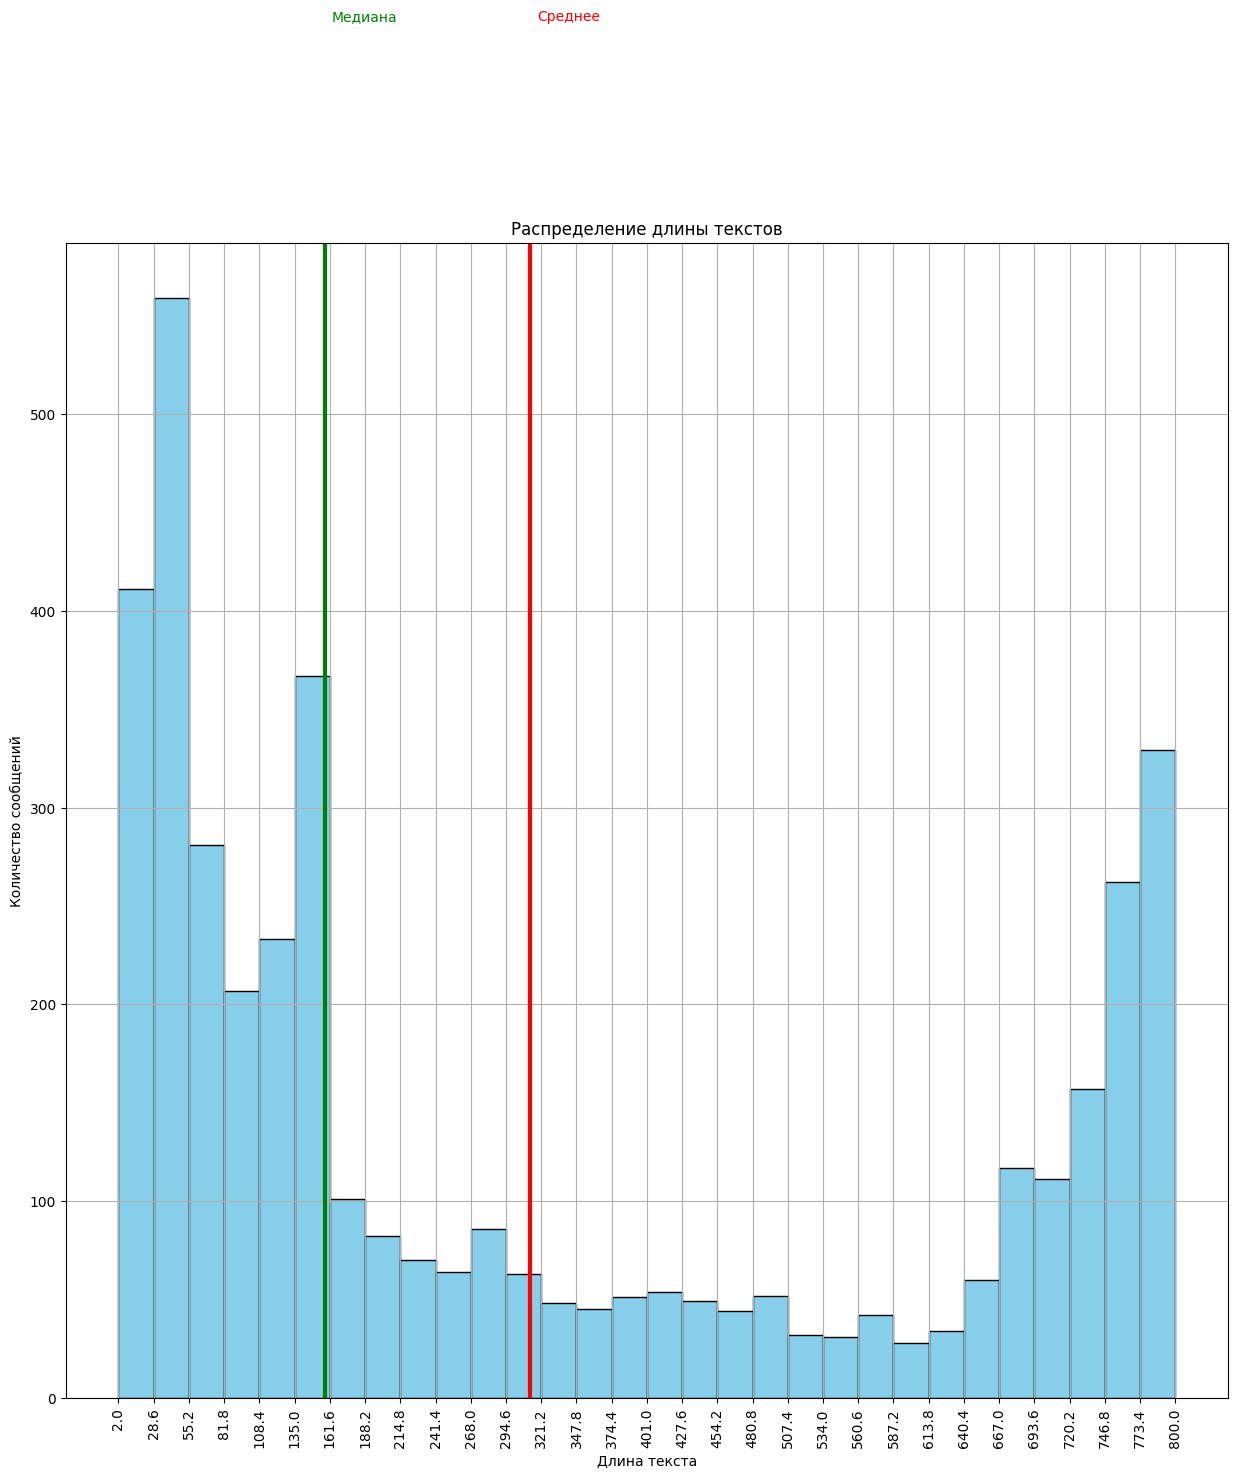

In [7]:
def len_distribution(df):
    text_len = df['text'].apply(len)
    print(f'–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è {text_len.min()}')
    print(f'–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è {text_len.max()}')
    print(f'–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è {text_len.mean()}')
    print(f'–ú–µ–¥–∏–∞–Ω–∞ –¥–ª–∏–Ω —Å–æ–æ–±—â–µ–Ω–∏–π {text_len.median()}')
    fig = plt.figure(figsize=(15, 15))
    bins = 30
    fig.add_subplot(1, 1, 1)
    plt.hist(text_len, bins=bins, color='skyblue', edgecolor='black')
    plt.axvline(text_len.mean(), color='red', linestyle='solid', linewidth=3)
    plt.text(text_len.mean() + 5, 700, f'–°—Ä–µ–¥–Ω–µ–µ', color='red')
    plt.axvline(text_len.median(), color='green', linestyle='solid', linewidth=3)
    plt.text(text_len.median() + 5, 700, f'–ú–µ–¥–∏–∞–Ω–∞', color='green')
    step = (text_len.max() - text_len.min()) / bins
    ticks = [text_len.min() + i * step for i in range(bins + 1)]
    plt.xticks(ticks, rotation=90)
    plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤')
    plt.xlabel('–î–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞')
    plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–æ–±—â–µ–Ω–∏–π')
    plt.grid(True)
    plt.show()


print('\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏\n')
len_distribution(df_train)
print('\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏\n')
len_distribution(df_test)

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏. –ú–æ–∂–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Ç–µ—Å—Ç–∞ –∏ —Ç—Ä–µ–π–Ω–∞ –≤–∑—è—Ç—ã –∏–∑ –æ–¥–Ω–æ–≥–æ –∏—Å—Ç–æ—á–Ω–∏–∫–∞. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ —Å–æ–æ–±—â–µ–Ω–∏—è –≤ —Ç–µ—Å—Ç–µ –∏ —Ç—Ä–µ–π–Ω–µ –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏. –ò—Å—Ö–æ–¥—è –∏–∑ —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Å–ø–∞–º –∏ –Ω–µ —Å–ø–∞–º –≤–ø–æ–ª–Ω–µ –≤–µ—Ä–æ—è—Ç–Ω–æ –±—É–¥–µ—Ç –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–º. –ö —Ç–æ–º—É –∂–µ –Ω–∞—É—á–∏–≤—à–∏—Å—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª—å –¥–æ–ª–∂–Ω–∞ —Ö–æ—Ä–æ—à–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ.

–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ –±—ã–ª–æ –±—ã –µ—â–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ä–µ–¥–∏ —Å–ø–∞–º –∏ –Ω–µ —Å–ø–∞–º —Å–æ–æ–±—â–µ–Ω–∏–π




–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ —Å–ø–∞–º

–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 1
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 800
–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 314.168279710524
–ú–µ–¥–∏–∞–Ω–∞ –¥–ª–∏–Ω —Å–æ–æ–±—â–µ–Ω–∏–π 141.0


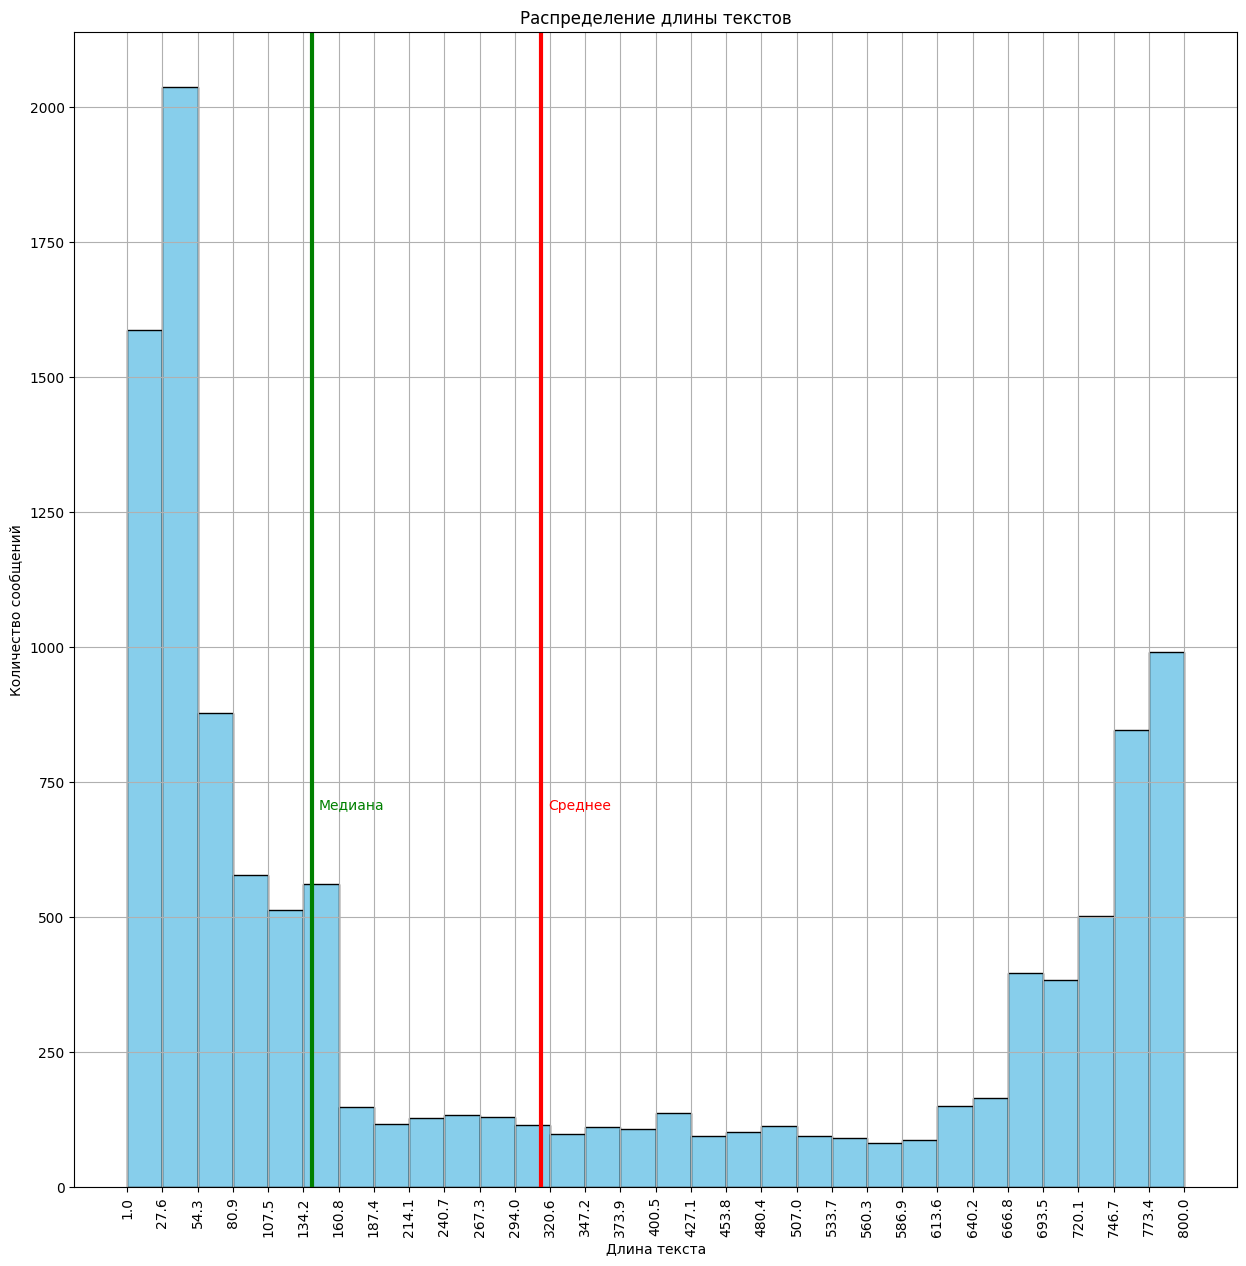


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ø–∞–º

–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 5
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 800
–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è 301.35724682886257
–ú–µ–¥–∏–∞–Ω–∞ –¥–ª–∏–Ω —Å–æ–æ–±—â–µ–Ω–∏–π 195.0


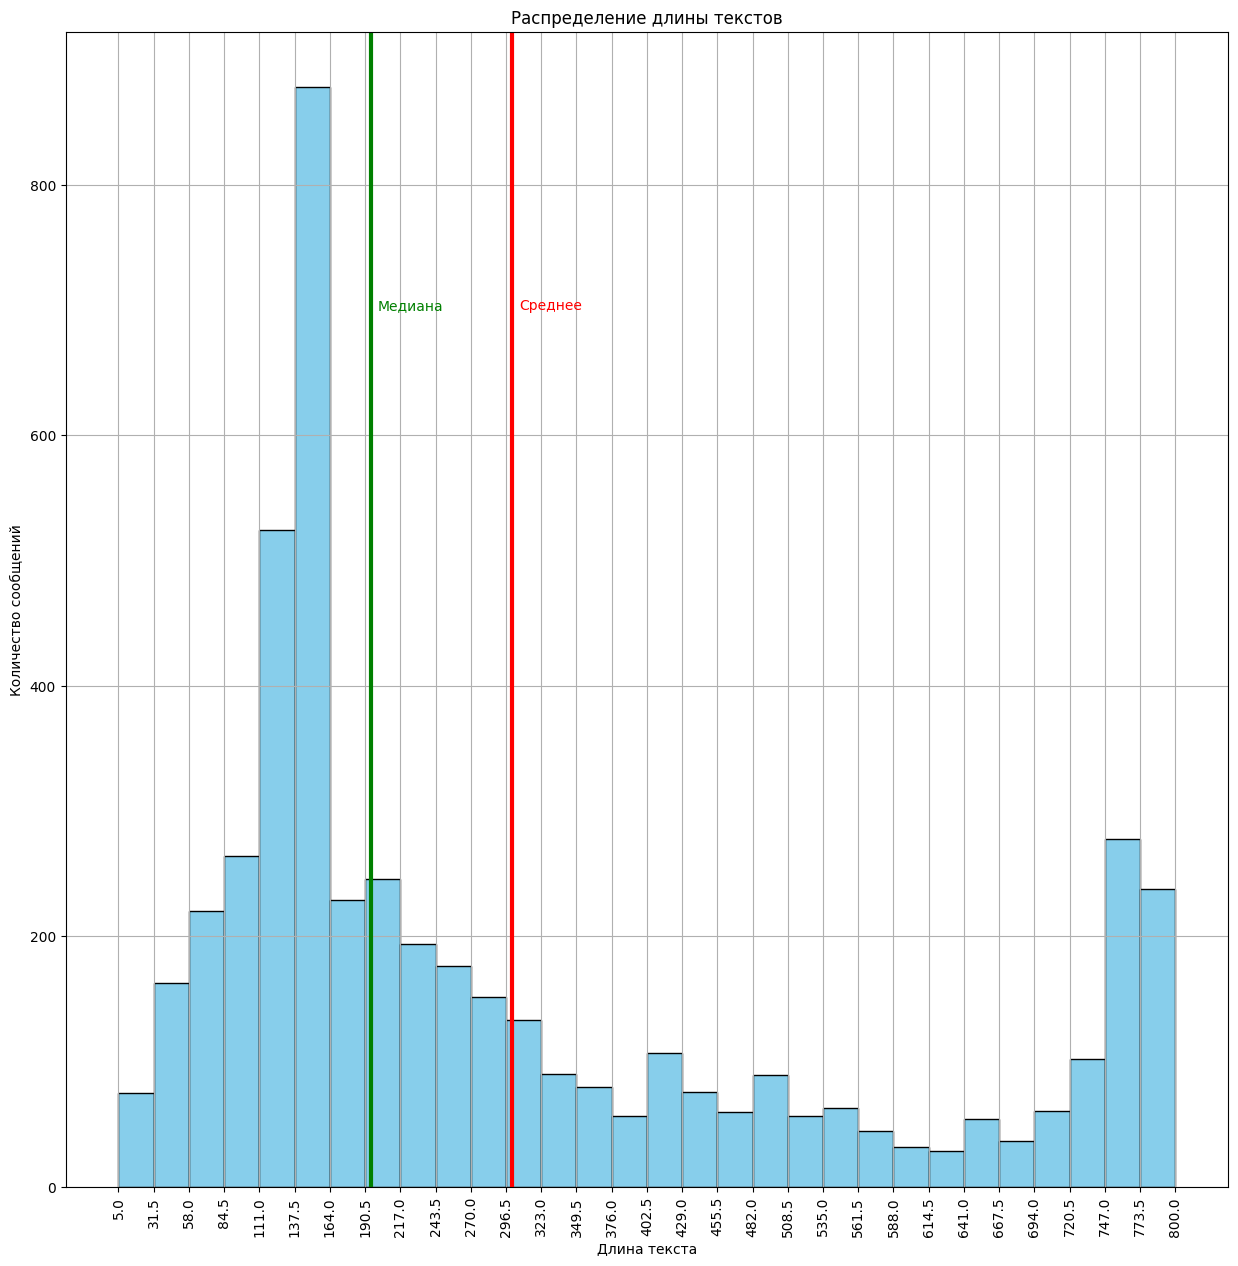

In [8]:
df_spam = df_train[df_train['text_type'] == 'spam']
df_ham = df_train[df_train['text_type'] == 'ham']
print('\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ —Å–ø–∞–º\n')
len_distribution(df_ham)
print('\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ø–∞–º\n')
len_distribution(df_spam)

–°–ø–∞–º –∏ –Ω–µ —Å–ø–∞–º –ø–æ–∫—Ä—ã–≤–∞—é—Ç –≤—Å—é –æ–±–ª–∞—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –ù–æ –≤ —Å–ø–∞–º–µ –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç –¥–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏–π –æ—Ç 110 –¥–æ 164 —Å–∏–º–≤–æ–ª–æ–≤, –≤ —Å–≤–æ—é –æ—á–µ—Ä–µ–¥—å –Ω–µ —Å–ø–∞–º —Å–æ–æ–±—â–µ–Ω–∏—è –≤ –±–æ–ª—å—à–µ–π —Å—Ç–µ–ø–µ–Ω–∏ –∫–æ—Ä–æ—á–µ.

–°–æ–æ–±—â–µ–Ω–∏–π —Å—Ä–µ–¥–Ω–µ–π –¥–ª–∏–Ω—ã –Ω–µ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ, –∞ –≤–æ—Ç –¥–ª–∏–Ω–Ω—ã—Ö –≤ 700-800 —Å–∏–º–≤–æ–ª–æ–≤ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–Ω–æ–≥–æ –∫–∞–∫ –≤ –∫–ª–∞—Å—Å–µ —Å–ø–∞–º —Ç–∞–∫ –∏ –≤ –∫–ª–∞—Å—Å–µ –Ω–µ —Å–ø–∞–º.

–ú–Ω–µ –µ—â–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–∞–∫ –¥–µ–ª–∞–ª–∞—Å—å —Ä–∞–∑–º–µ—Ç–∫–∞ –Ω–∞ –æ—á–µ–Ω—å –∫–æ—Ä–æ—Ç–∫–∏—Ö —Å–æ–æ–±—â–µ–Ω–∏—è—Ö

In [9]:
df_short_spam = df_spam[df_spam['text'].apply(len) <= 20]
df_short_ham = df_ham[df_ham['text'].apply(len) <= 10]
print(df_short_spam.head(20))
print(df_short_ham.head(20))

      text_type                  text
320        spam      please subscribe
513        spam             subscribe
1630       spam         dm me sub for
2418       spam    massage me uc free
2571       spam                 links
2768       spam    ringtoneking 84484
3959       spam      noob¬£sneha sneha
4556       spam         ous/airy room
4765       spam             join karo
4900       spam        check this out
6609       spam          22 146tf150p
8814       spam             donate to
9160       spam      chocolate treat!
9209       spam              join now
9317       spam         ‚úÖ‚úÖ‚úÖ‚úÖ‚úÖ‚úÖ‚úÖ‚úÖ‚úÖ‚úÖ‚úÖ‚úÖ‚úÖ
9686       spam          i am spammer
9883       spam        dating online?
10084      spam      hi girls dmmeüòâ üí∞
10882      spam  üí∞ get app & win cash
11352      spam       free 100$ token
     text_type        text
76         ham      urgent
113        ham    im sorry
149        ham        fast
167        ham      yup ok
193        ham   free fire
233 

–ü–æ—Ö–æ–∂–µ –Ω–∞ –ø—Ä–∞–≤–¥—É. –ù–∞ –æ—á–µ–Ω—å –∫–æ—Ä–æ—Ç–∫–∏—Ö —Å–æ–æ–±—â–µ–Ω–∏—è—Ö –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–∞—è —Ä–∞–∑–º–µ—Ç–∫–∞.

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

–î–ª—è –Ω–∞—á–∞–ª–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ –≤ —á–∏—Å–ª–æ–≤–æ–π —Ñ–æ—Ä–º–∞—Ç. –ü—É—Å—Ç—å —Å–ø–∞–º –±—É–¥–µ—Ç —Å –º–µ—Ç–∫–æ–π 1, –∞ –Ω–µ —Å–ø–∞–º —Å –º–µ—Ç–∫–æ–π 0.

–¢–∞–∫–∂–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ö –∏ y, –∞ —Ç–∞–∫–∂–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_train['text'], df_train['text_type'], shuffle=True, test_size=0.2, random_state=42)
y_test = y_test.apply(lambda x: 1 if x == 'spam' else 0)
y_train = y_train.apply(lambda x: 1 if x == 'spam' else 0)

–ü—Ä–æ–≤–µ—Ä–∏–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –∫–æ–¥–∞

In [11]:
print(x_train.head())
print(x_train.shape)
print(x_test.head())
print(x_test.shape)
print(y_train.head())
print(y_train.shape)
print(y_test.head())
print(y_test.shape)

1157                           going to take your babe out
3474     ken attached is a correction to pages 10 11 an...
4084                            except android is a cucked
1383     stop been afraid stop the procrastination make...
14626    on aug 1635465 bort paul wrote if your sendmai...
Name: text, dtype: object
(13022,)
11533    pi is a new digital currency developed by stan...
5862     ùêº ùëëùëú ùëèùëíùëôùëíùëñùë£ùëí ùëúùëõ ùëìùëúùëüùëíùë• ùë°ùëüùëéùëëùëí ùëéùëìùë°ùëíùëü ùëöùë¶ ùë§ùëñùë°‚Ñéùëëùëüùëéùë§ùëé...
123      when i earn my first $10000 on forex trade it ...
2771     i dnt knw jab tayaar houngi tab bta dungi nd j...
8246                                who told dis? naam bta
Name: text, dtype: object
(3256,)
1157     0
3474     0
4084     0
1383     1
14626    0
Name: text_type, dtype: int64
(13022,)
11533    1
5862     1
123      1
2771     0
8246     0
Name: text_type, dtype: int64
(3256,)


–ú–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è —Ä–∞–±–æ—Ç–∞—é—Ç —Ç–æ–ª—å–∫–æ —Å —Ü–∏—Ñ—Ä–∞–º–∏, –ø–æ—ç—Ç–æ–º—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–¥–µ–ª–∞—Ç—å –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—é –¥–∞–Ω–Ω—ã—Ö. –°—É—â–µ—Å—Ç–≤—É–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ –ø–æ–¥—Ö–æ–¥–æ–≤ –∫ —Ä–µ—à–µ–Ω–∏—é –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ.

–ù–∞–∏–±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç—ã–º —Å—á–∏—Ç–∞–µ—Ç—Å—è Count Vectorizer. –í –∫–æ—Ç–æ—Ä–æ–º –º—ã —Å–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å –∏–∑ –≤—Å–µ—Ö –∏–º–µ—é—â–∏—Ö—Å—è —É –Ω–∞—Å —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤, –∞ –ø–æ—Å–ª–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–æ–æ–±—â–µ–Ω–∏—è —Å—á–∏—Ç–∞–µ–º —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ —Å–ª–æ–≤–∞ –∏–∑ —Å–ª–æ–≤–æ—Ä—è –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤ –Ω–∞—à–µ–º —Å–æ–æ–±—â–µ–Ω–∏–∏.

–¢–∞–∫–∂–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç TF-IDF –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è. –ü–æ–¥–æ–±–Ω—ã–π –ø–æ–¥—Ö–æ–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç —É–º–µ–Ω—å—à–∏—Ç—å –≤–ª–∏—è–Ω–∏–µ –Ω–∞–∏–±–æ–ª–µ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã—Ö —Å–ª–æ–≤ –∏ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–∏—Ç—å—Å—è –Ω–∞ –≥–ª–∞–≤–Ω—ã—Ö.

–í–µ–∫—Ç–æ—Ä–∏–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ 2 —Ä–∞–∑–Ω—ã–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏ –∏ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º —Å—Ä–∞–≤–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

–ó–∞–æ–¥–Ω–æ —É–¥–∞–ª–∏–º —Å–ª–æ–≤–∞ –∏–∑ —Å–ø–∏—Å–∫–∞ english stop_words. –í –Ω–µ–º –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã —Ä–∞–∑–ª–∏—á–Ω—ã–µ –ø—Ä–µ–¥–ª–æ–≥–∏, —Å–æ—é–∑—ã –∏ –ø—Ä–æ—á–∏–µ, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –Ω–µ—Å—É—Ç —Å–º—ã—Å–ª–æ–≤–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏.


In [12]:
count_vec = CountVectorizer(stop_words='english')
count_vec.fit(x_train)
x_train_count_vec = count_vec.transform(x_train)
x_test_count_vec = count_vec.transform(x_test)
tfidf_vec = TfidfVectorizer(stop_words='english')
tfidf_vec.fit(x_train)
x_train_tfidf_vec = tfidf_vec.transform(x_train)
x_test_tfidf_vec = tfidf_vec.transform(x_test)

–¢–µ–ø–µ—Ä—å —É –Ω–∞—Å –≤—Å–µ –≥–æ—Ç–æ–≤–æ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π.

–ü–æ —Å—É—Ç–∏ –ø–µ—Ä–µ–¥ –Ω–∞–º–∏ —Å—Ç–æ–∏—Ç –∑–∞–¥–∞—á–∞ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

–î–ª—è —Ä–µ—à–µ–Ω–∏—è —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ –≤ –æ–±–ª–∞—Å—Ç–∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤–µ–∫—Ç–æ—Ä–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤ —Ö–æ—Ä–æ—à–æ –ø–æ–¥–æ–π–¥—É—Ç:
1.–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
2.–°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å
3.–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥

–ü–æ—Å—Ç—Ä–æ–∏–º –∫–∞–∂–¥—É—é –º–æ–¥–µ–ª—å –¥–ª—è 2 —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–π –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ –∏ –ø–æ–¥—Å—á–∏—Ç–∞–µ–º roc-auc –º–µ—Ç—Ä–∏–∫—É. –î–ª—è –Ω–∞—á–∞–ª–∞ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–∞–∑–æ–≤—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã.

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ roc-auc –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è roc-auc –∫—Ä–∏–≤–æ–π

In [13]:
def calculate_roc_auc(y_predict, y_test=y_test, model_name='–º–æ–¥–µ–ª—å'):
    print(f'\nROC-AUC –¥–ª—è –º–æ–¥–µ–ª–∏: {model_name}\n')
    roc_auc = roc_auc_score(y_test, y_predict)
    print('ROC AUC=%.3f' % (roc_auc))
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC –∫—Ä–∏–≤–∞—è (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name}')
    plt.legend(loc="lower right")
    plt.show()

# –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è


ROC-AUC –¥–ª—è –º–æ–¥–µ–ª–∏: –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å count –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π

ROC AUC=0.982


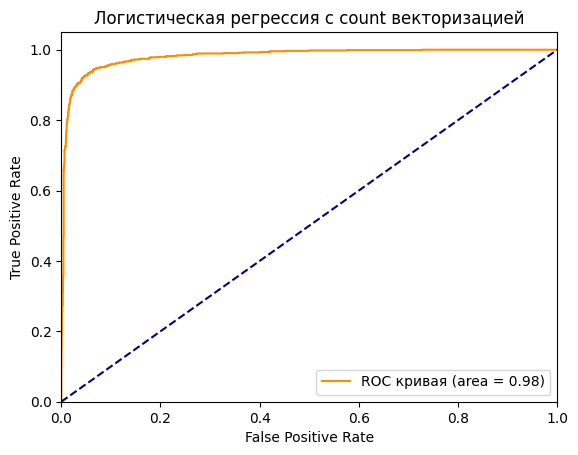


ROC-AUC –¥–ª—è –º–æ–¥–µ–ª–∏: –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å TF-IDF –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π

ROC AUC=0.977


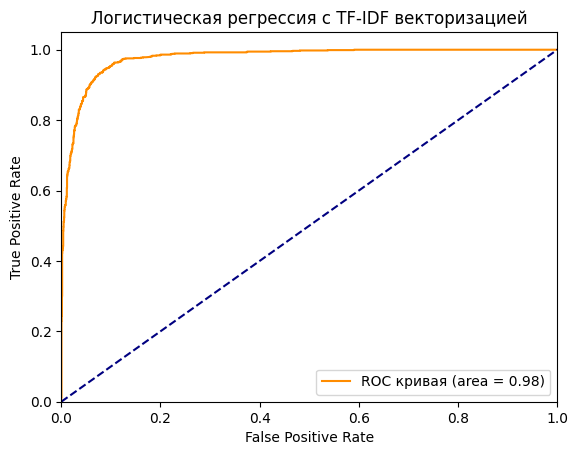

In [16]:
logreg_model_count = LogisticRegression(random_state=42)
logreg_model_count.fit(x_train_count_vec, y_train)
calculate_roc_auc(logreg_model_count.predict_proba(x_test_count_vec)[:, 1], model_name='–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å count –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π')
logreg_model_tfidf = LogisticRegression(random_state=42)
logreg_model_tfidf.fit(x_train_tfidf_vec, y_train)
calculate_roc_auc(logreg_model_tfidf.predict_proba(x_test_tfidf_vec)[:, 1], model_name='–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å TF-IDF –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π')

# –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å


ROC-AUC –¥–ª—è –º–æ–¥–µ–ª–∏: –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å —Å count –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π

ROC AUC=0.978


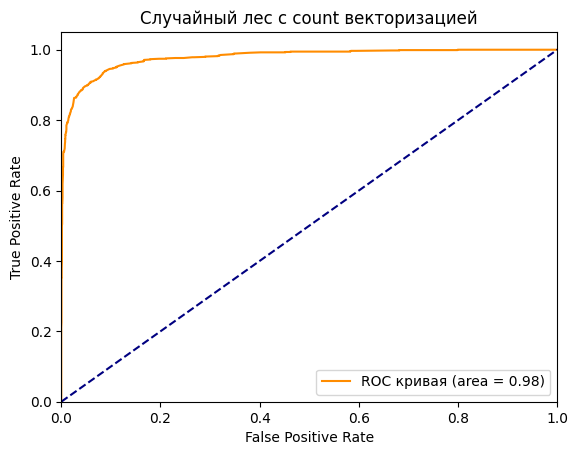


ROC-AUC –¥–ª—è –º–æ–¥–µ–ª–∏: –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å —Å TF-IDF –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π

ROC AUC=0.982


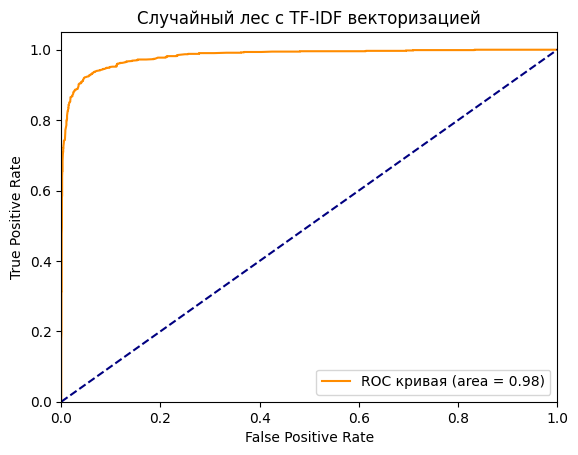

In [17]:
rf_model_count = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_count.fit(x_train_count_vec, y_train)
calculate_roc_auc(rf_model_count.predict_proba(x_test_count_vec)[:, 1],
                  model_name='–°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å —Å count –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π')
rf_model_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_tfidf.fit(x_train_tfidf_vec, y_train)
calculate_roc_auc(rf_model_tfidf.predict_proba(x_test_tfidf_vec)[:, 1],
                  model_name='–°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å —Å TF-IDF –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π')

# –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥


ROC-AUC –¥–ª—è –º–æ–¥–µ–ª–∏: –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ —Å count –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π

ROC AUC=0.971


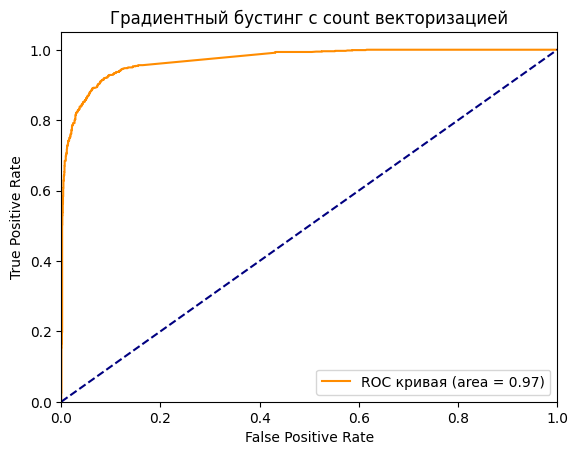


ROC-AUC –¥–ª—è –º–æ–¥–µ–ª–∏: –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ —Å TF-IDF –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π

ROC AUC=0.971


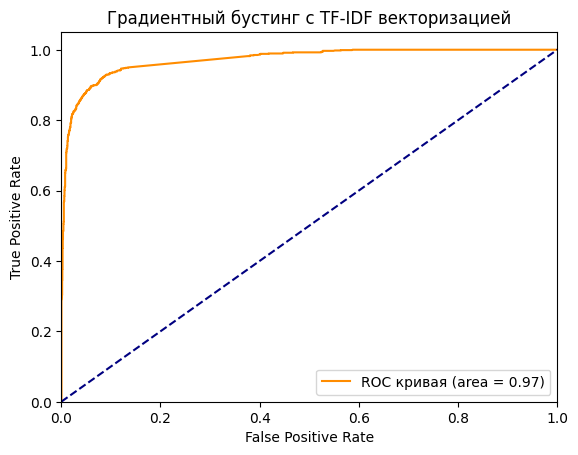

In [18]:
xgb_model_count = XGBClassifier(n_estimators=100, max_depth=6,
                                use_label_encoder=False, eval_metric='auc', random_state=42)
xgb_model_count.fit(x_train_count_vec, y_train)
calculate_roc_auc(xgb_model_count.predict_proba(x_test_count_vec)[:, 1],
                  model_name='–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ —Å count –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π')
xgb_model_tfidf = XGBClassifier(n_estimators=100, max_depth=6,
                                use_label_encoder=False, eval_metric='auc', random_state=42)
xgb_model_tfidf.fit(x_train_tfidf_vec, y_train)
calculate_roc_auc(xgb_model_tfidf.predict_proba(x_test_tfidf_vec)[:, 1],
                  model_name='–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ —Å TF-IDF –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π')

–ü–æ–∑–∞–ø—É—Å–∫–∞—è –º–æ–¥–µ–ª–∏ —Å —Ä–∞–∑–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, —Ä–∞–∑–Ω—ã–º–∏ random state —Å –Ω–µ–±–æ–ª—å—à–∏–º –æ—Ç—Ä—ã–≤–æ–º –ª–∏–¥–∏—Ä—É–µ—Ç –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å count –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π, –∫ —Ç–æ–º—É –∂–µ –æ–Ω–∞ –º–µ–Ω–µ–µ —Ä–µ—Å—É—Ä—Å–æ–µ–º–∫–∞—è –∏ –ª—É—á—à–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ—Ç—Å—è.

–ü–æ—ç—Ç–æ–º—É –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ–µ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [20]:
test_vec = count_vec.transform(df_test['text'])
predict_test = logreg_model_count.predict_proba(test_vec)[:, 1]
df_test['score'] = pd.DataFrame(predict_test)
name_dataset_score = 'test_score.csv'
df_test.to_csv('/'.join([path_to_dir, name_dataset_score]))

–ü–æ–ª—É—á–∏–ª–∏—Å—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –Ω–µ–ø–ª–æ—Ö–∞—è –º–æ–¥–µ–ª—å, –æ–¥–Ω–∞–∫–æ –Ω–µ–ª—å–∑—è –∏—Å–∫–ª—é—á–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –µ–µ —É–ª—É—á—à–∏—Ç—å

–¢–∞–∫–∂–µ –Ω–µ —É–≤–µ—Ä–µ–Ω —á—Ç–æ –≤ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–º —Ñ–æ—Ä–º–∞—Ç–µ –∑–∞–ø–∏—Å–∞–ª —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –í –≥—Ä–∞—Ñ–µ score —É–∫–∞–∑–∞–Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–∏—Å—å–º–∞ –±—ã—Ç—å —Å–ø–∞–º–æ–º (–∏–∑–º–µ–Ω—è–µ—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 0 –¥–æ 1, –≥–¥–µ 0 - –Ω–µ —Å–ø–∞–º, –∞ 1 - —Å–ø–∞–º)